In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy.stats import norm


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [5]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv("../input/test.csv")


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
all_data = pd.concat([train.loc[:, 'MSSubClass':'SaleCondition'], test.loc[:, 'MSSubClass':'SaleCondition']])

In [13]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

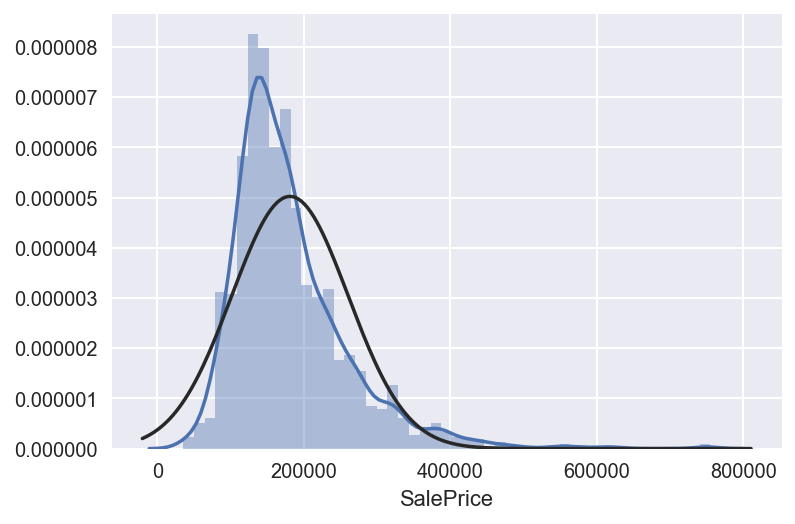

In [17]:
sns.distplot(train['SalePrice'], fit=norm)

In [18]:
train['SalePrice'] = np.log1p(train['SalePrice'])

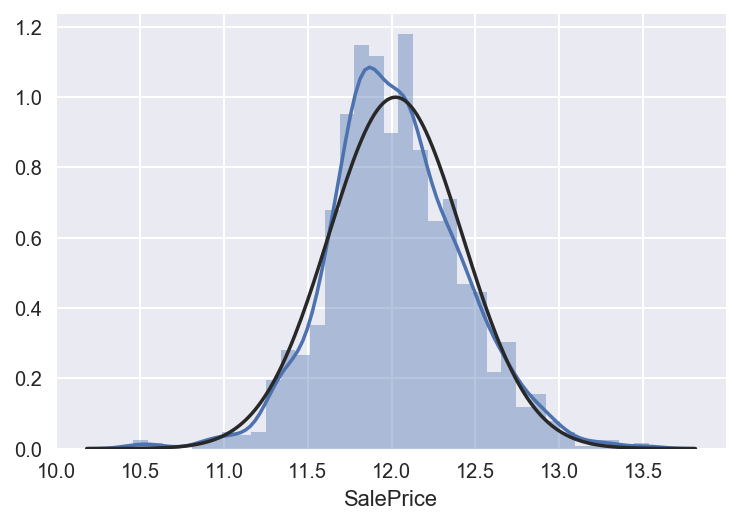

In [19]:
sns.distplot(train['SalePrice'], fit=norm)

In [20]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index


In [22]:
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness


In [24]:
skewed_feats = skewed_feats[skewed_feats > 0.75]


In [25]:
all_data[skewed_feats.index] = np.log1p(all_data[skewed_feats.index])

In [26]:
all_data = pd.get_dummies(all_data)

In [48]:
X_train = all_data.iloc[:len(train), :]
X_test = all_data.iloc[len(train):, :]

In [49]:
y_train = train['SalePrice']

In [50]:
all_data = all_data.fillna(all_data.mean())

In [51]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score


In [52]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [53]:
model_ridge = Ridge()


In [54]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

In [55]:
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

In [56]:
cv_ridge

[0.13893637694024527,
 0.13777538277187876,
 0.13501433618086034,
 0.13136184989399566,
 0.12864892446111886,
 0.12782179689257314,
 0.12733734668670763,
 0.12752940439753807,
 0.12895888148450049,
 0.13099437857191409,
 0.13316366423370257]

In [57]:
cv_ridge = pd.Series(cv_ridge, index = alphas)


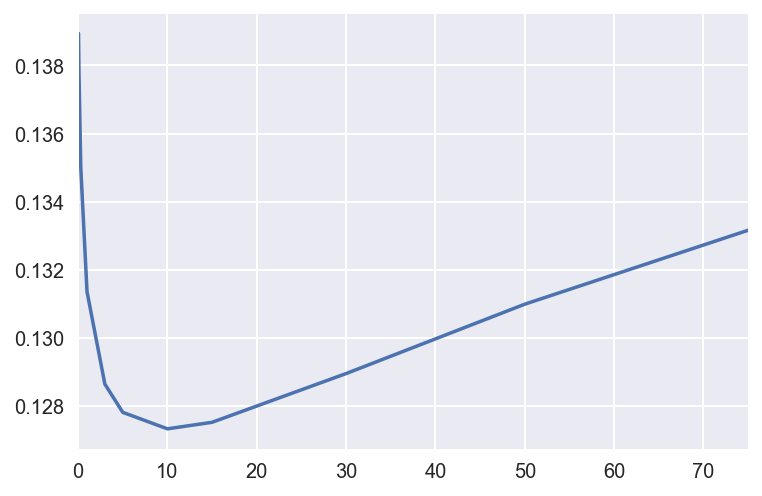

In [59]:
cv_ridge.plot()

In [62]:
import xgboost as xgb

In [63]:
dtrain = xgb.DMatrix(data=X_train, label=y_train, feature_names=X_train.columns.values)

In [70]:
dtest = xgb.DMatrix(data=X_test)

In [ ]:
params = {
    ""
}